## Zadanie domowe: morfologiczna gra w życie – John Conway

### Wykorzystanie operacji LUT w przekształceniu trafi, nie trafi
  - Szybszą metodą wykonania transformacji trafi, nie trafi może być operacja LUT.
  - Technika polega na zakodowaniu wyników wszystkich interesujących  konfiguracji, a następnie podczas przetwarzania wykorzystania operacji LUT.
  - Dla otoczenia 3x3 możliwe jest 512 różnych konfiguracji.
  - Aby praktycznie zrealizować operacje, każdej konfiguracji należy nadać unikalny indeks. Jedną z możliwości jest pomnożenie elementu strukturalnego przez macierz (mnożenie odpowiednich elementów):
  ```
  [[1, 8,  64],
   [ 2, 16, 128],
   [ 4, 32, 256]]
  ```
  Przykładowo elementowi:
  ```
  [[1, 1, 0],
   [ 1, 0, 1],
   [ 1, 0, 1]]
  ```
  odpowiada liczba: 1(1) + 2(1) + 4(1) + 8(1) + 128(1) + 256(1) = 399.
  
### Przykład działania metody – detekcja punktów końcowych na obrazie.
  - założenie: punkt końcowy to punkt, który ma dokładnie jednego sąsiada,
  - zdefiniuj funkcję, która jako argument pobiera otoczenie, a zwraca 0 lub 1 w zależności od tego, czy rozpatrywany punkt jest końcowy np. dla sąsiedztwa 3×3 punkt będzie końcowy, jeżeli jest zapalony i ma tylko jednego sąsiada (czyli suma pikseli jest równa 2).
  - wygeneruj przekodowanie LUT.
  - wczytaj obraz szkielet.bmp (należy go przekształcić, aby uzyskać dwuwymiarową tablicę o wartościach 0-1). Wykorzystując wygenerowane przekodowanie LUT wykonaj detekcję zakończeń. Wyświetl obraz oryginalny i po przekodowaniu LUT.


In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os
from itertools import permutations


def get_file(url_path, filename):
    if not os.path.exists(filename):
        url = url_path
        r = requests.get(url, allow_redirects=True)
        open(filename, 'wb').write(r.content)

get_file('https://raw.githubusercontent.com/vision-agh/poc_sw/master/10_Morphology/szkielet.bmp', 'szkielet.bmp')


base = np.array([
    [1, 8,  64],
    [2, 16, 128],
    [4, 32, 256]
])

def multip(A,B):
    assert A.shape == B.shape
    total = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            total += A[i][j]*B[i][j]
    return total

In [2]:
lut = {}
nums = [[0,0,0],[1,0,0],[1,1,0],[1,1,1]]
perms = []
for num in nums:
    for p in permutations(num):
        perms.append(p)

for p1 in perms:
    for p2 in perms:
        for p3 in perms:
            curr = np.array([p1, p2, p3])
            if curr[1][1] and np.sum(curr) == 2:
                lut[multip(curr, base)] = 1
            else:
                lut[multip(curr, base)] = 0
                
def lookup(kernel):
    return lut[multip(kernel, base)]

In [3]:
szkielet = cv2.imread('szkielet.bmp')
szkielet = cv2.cvtColor(szkielet, cv2.COLOR_BGR2GRAY)
for i in range(szkielet.shape[0]):
    for j in range(szkielet.shape[1]):
        szkielet[i][j] = 1 if szkielet[i][j] else 0
        

def final_points(img):
    result = np.zeros(img.shape)
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            if img[i][j]:
                curr = np.array([[img[i-1][j-1], img[i-1][j], img[i-1][j+1]],
                                 [img[i][j-1], img[i][j], img[i][j+1]],
                                 [img[i+1][j-1], img[i+1][j], img[i+1][j+1]]])
                result[i][j] = lookup(curr)
    return result

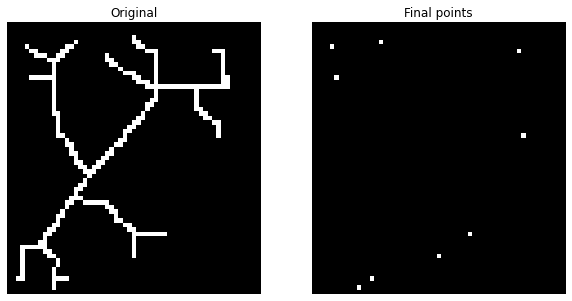

In [4]:
result = final_points(szkielet)
fig, axs = plt.subplots(1, 2)
images = [szkielet, result]
titles = ["Original", "Final points"]
for i in range(len(images)):
    axs[i].imshow(images[i], 'gray')
    axs[i].axis('off')
    axs[i].set_title(titles[i])
fig.set_size_inches(10,10)
plt.show()

### Gra w życie

Reguły gry w życie:
  - każdy piksel biały, który ma dwóch lub trzech sąsiadów (białych) przeżywa,
  - każdy piksel biały, który ma 0,1 lub więcej niż trzech sąsiadów (białych) nie przeżywa (głód lub przeludnienie),
  - jeżeli jakieś pole (czarne) sąsiaduje dokładnie z trzema pikselami białymi, to na tym polu ,,rodzi'' się nowy piksel biały.

Zadanie:
  - za pomocą mechanizmu LUT (opisanego wcześniej) należy zaimplementować morfologiczną gre w życie,
  - najważniejszym elementem jest funkcja opisująca reguły gry,
  - symulacje należny przeprowadzić dla plansz plansza1 oraz plansza2 (zob. komórka poniżej),
  - dobrze jest wykonać kilka iteracji – zobaczyć jak zmienia się kształt,
  - inne ciekawe kształty do znalezienia w internecie.

In [5]:
import numpy as np

plansza1 = np.array([
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	1,	0,	0,	1,	0,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	1,	0,	1,	1,	0,	1,	0,	0],
    [0,	0,	1,	0,	0,	0,	0,	1,	0,	0],
    [0,	0,	0,	1,	1,	1,	1,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

plansza2 = np.array([
    [0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [0,	0,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	1,	1],
    [1,	1,	1,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0],
    [0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0,	0]], np.uint8)

base = np.array([
    [1, 8,  64],
    [2, 16, 128],
    [4, 32, 256]
])

In [6]:
def multip(A,B):
    assert A.shape == B.shape
    total = 0
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            total += A[i][j]*B[i][j]
    return total


def in_bounds(pos, board):
    y, x = pos
    height, width = board.shape[0], board.shape[1]
    return not(y < 0 or x < 0 or y >= height or x >= height)


def count_neighbours(board):
    neigh = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            if i == 0 and j == 0: continue
            if in_bounds((1+i, 1+j), board) and board[1+i][1+j]:
                neigh += 1
    return neigh


def will_survive(board):
    if not board[1][1]: return False
    neigh = count_neighbours(board)
    return neigh == 2 or neigh == 3


def will_born(board):
    if board[1][1]: return False
    neigh = count_neighbours(board)
    return neigh == 3

In [7]:
def make_lut():
    lut = {}
    nums = [[0,0,0],[1,0,0],[1,1,0],[1,1,1]]
    perms = []
    for num in nums:
        for p in permutations(num):
            perms.append(p)

    for p1 in perms:
        for p2 in perms:
            for p3 in perms:
                curr = np.array([p1, p2, p3])
                if curr[1][1]:
                    lut[multip(curr, base)] = 1 if will_survive(curr) else 0
                else:
                    lut[multip(curr, base)] = 1 if will_born(curr) else 0
    return lut


lut = make_lut()


def lookup(kernel):
    return lut[multip(kernel, base)]

In [8]:
def prepare_board(img):
    vertical = np.zeros((1, img.shape[1]))
    img = np.vstack((img, vertical))
    img = np.vstack((vertical, img))
    horizontal = np.zeros((img.shape[0], 1))
    img = np.hstack((img, horizontal))
    img = np.hstack((horizontal, img))
    return img
    

def game_of_life(original_img):
    img = prepare_board(original_img)
    result = np.zeros(img.shape)
    for i in range(1, img.shape[0]-1):
        for j in range(1, img.shape[1]-1):
            curr = np.array([[img[i-1][j-1], img[i-1][j], img[i-1][j+1]],
                             [img[i][j-1], img[i][j], img[i][j+1]],
                             [img[i+1][j-1], img[i+1][j], img[i+1][j+1]]])
            result[i][j] = lookup(curr)
    result = np.delete(result, 0, 0)
    result = np.delete(result, 0, 1)
    result = np.delete(result, result.shape[0]-1, 0)
    result = np.delete(result, result.shape[1]-1, 1)
    return result

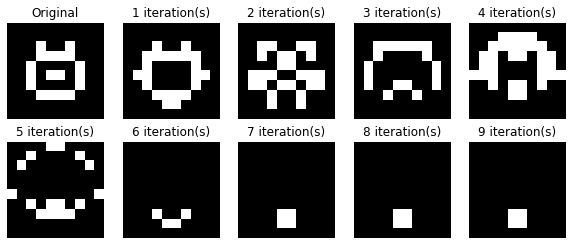

In [19]:
images = [plansza1]
titles = ["Original"]

for i in range(9):
    result = game_of_life(images[-1])
    images.append(result)
    titles.append(f'{i+1} iteration(s)')

fig, axs = plt.subplots(2, len(images)//2)
for i in range(len(images)):
    index = 0 if i < len(images)//2 else 1
    axs[index][i%5].imshow(images[i], 'gray')
    axs[index][i%5].axis('off')
    axs[index][i%5].set_title(titles[i])
fig.set_size_inches(10, 4)

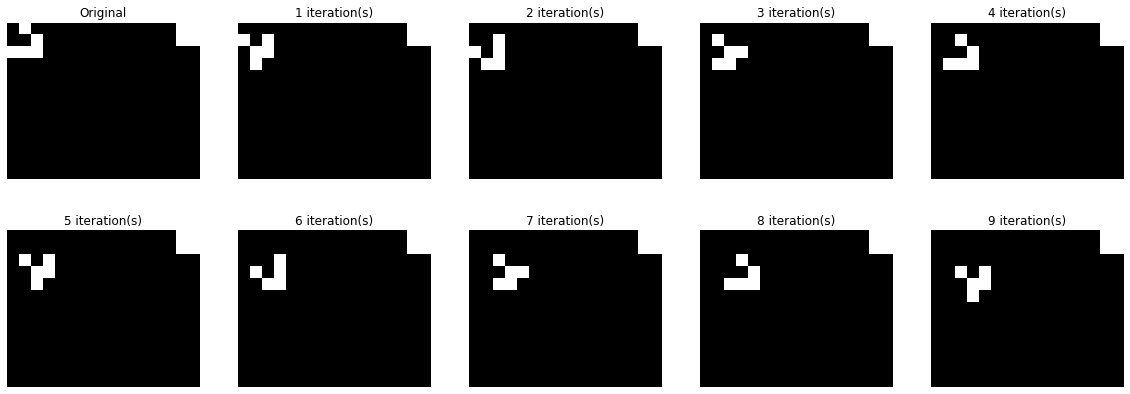

In [20]:
images = [plansza2]
titles = ["Original"]

for i in range(9):
    result = game_of_life(images[-1])
    images.append(result)
    titles.append(f'{i+1} iteration(s)')

fig, axs = plt.subplots(2, len(images)//2)
for i in range(len(images)):
    index = 0 if i < len(images)//2 else 1
    axs[index][i%5].imshow(images[i], 'gray')
    axs[index][i%5].axis('off')
    axs[index][i%5].set_title(titles[i])
fig.set_size_inches(20, 7)

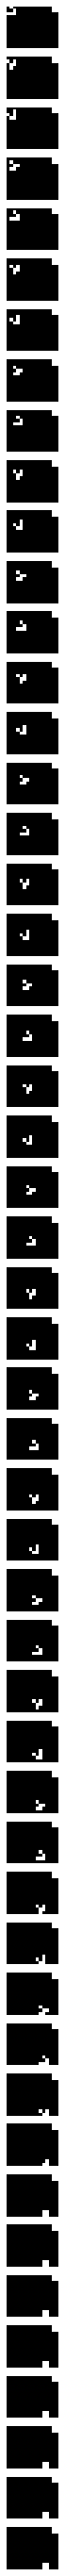

In [21]:
images = [plansza2]
titles = ["Original"]

for i in range(50):
    result = game_of_life(images[-1])
    images.append(result)
    titles.append(f'{i+1} iteration(s)')
    
fig, axs = plt.subplots(len(images), 1)
for i in range(len(images)):
    axs[i].imshow(images[i], 'gray')
    axs[i].axis('off')
fig.set_size_inches(10, 50)